Deep Model은 black box로 내부 작동 원리를 파악하는 데 어려움이 있다. <br>
하지만 이러한 작동 원리를 이해하기 위한 visualization 방법들이 개발되고 있다. <br>
해당 논문은 이전에 발표된 Grad-CAM보다 더 발전된 Grad-CAM++를 제안한다고 한다.

<h3> <strong> Flaw of Grad-CAM </strong> </h3>

(1) 이미지에 같은 클래스의 여러 object가 존재하면 localize에 어려움을 가진다. <br> 
(2) 또한 전체 object를  localize하기 힘들다.

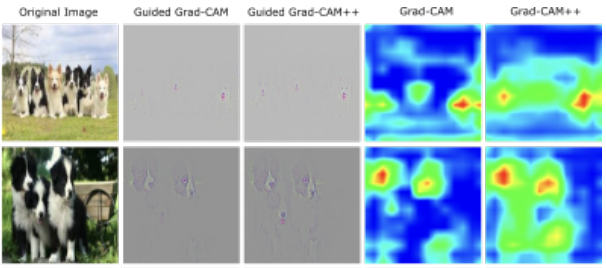

<h3> <strong> Principle of Grad-CAM++ </strong> </h3>

Grad-CAM의 GAP은 feature map의 각 원소 값의 gradient를 계산하고 해당 값들을 GAP하여 weight를 구한다. <br>
즉, Grad-CAM은 GAP를 사용하여 gradient값을 하나로 합치기 때문에 **주요한 gradient가 뭉개지는 문제**가 발생할 수 있다. <br>
Grad-CAM은 이러한 문제를 해결하기 위해 GAP가 아니라 **weighted sum**방식을 사용한다. <br>
수식은 다음과 같다.

>$Y^c = ∑_k{w_k^c}∑_i∑_j{A_{ij}}$ <br>
>$w_k^c=∑_i\sum_j α_{ij}^{kc} \cdot ReLU \left( \frac{\partial Y^c}{\partial A^k_{ij}} \right)$
>
> * $w_k^c$: class(c)에 대한 feature(k)의 중요도
> * $α_{ij}^{kc}$: class(c)에 대한 feature map($A^k_{ij}$)의 중요도 <br>
만약 해당 값이 $\frac{1}{Z}$가 되면 Grad-CAM의 식과 동일하다. (ReLU 제외시) <br>
> * ReLU: Grad-CAM에서는 class에 대해 positive한 gradient만 사용하기 위해 모든 feature map에 각 가중치를 곱하고 해당 map들을 합한 뒤에 ReLU를 수행했다. <br>
Grad-CAM은 gradient 계산 시 바로 ReLU를 적용시켜 positive한 gradient만 사용한다. (즉, pixel-level에서 ReLU가 적용된다.)


아래는 지금까지 나온 CAM, Grad-CAM, Grad-CAM++에 대한 요약 그림이다.

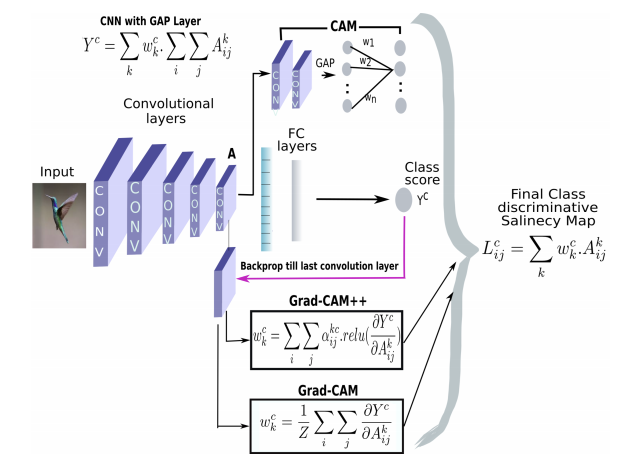

<h3> <strong> Result </strong> </h3>

Grad-CAM++는 아래와 같이 이미지 안에 해당 클래스의 여러 object가 존재해도 잘 분류하는 것을 볼 수 있다. <br>
또한 Grad-CAM에 비해 전체 이미지를 더 잘 visulization하는 모습을 보여준다.

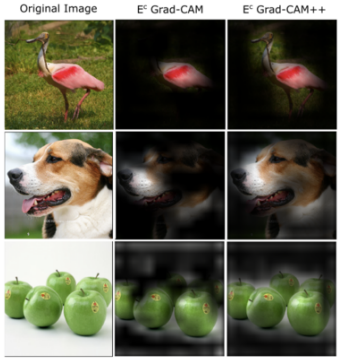